In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("C:\\Users\\tkabe\\myprojects\\Untitled Folder\\cardio.csv")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data.shape

(70000, 13)

In [6]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
data.duplicated().sum()

0

<AxesSubplot:>

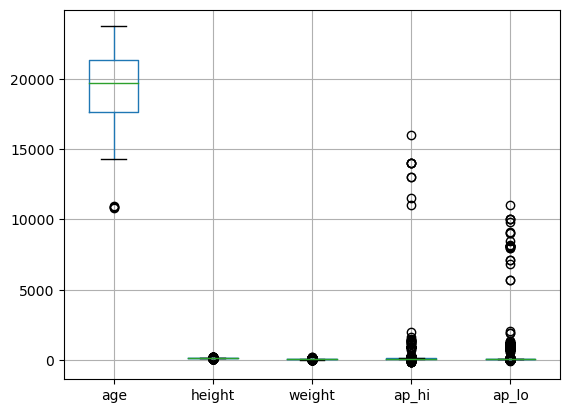

In [9]:
data[["age","height","weight","ap_hi","ap_lo"]].boxplot()

In [14]:
data["age"]=(data["age"]/365).astype(int)
data.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1


In [18]:
data["bmi"]=data["weight"]/((data["height"])/100)**2

In [19]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [22]:
data.drop(["height","weight"],axis=1,inplace=True)

In [23]:
data.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,100,60,1,1,0,0,0,0,23.011177


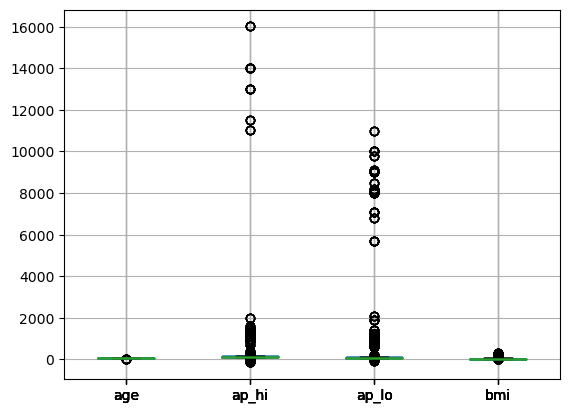

In [30]:
data[["age","ap_hi","ap_lo","bmi"]].boxplot()
plt.show()

In [31]:
data_num=data[["age","ap_hi","ap_lo","bmi"]]

In [33]:
Q1=data_num.quantile(0.25)
Q3=data_num.quantile(0.75)

IQR=Q3-Q1

In [34]:
IQR

age      10.000000
ap_hi    20.000000
ap_lo    10.000000
bmi       6.347107
dtype: float64

In [40]:
out_rows=((data_num<(Q1-1.5*IQR))|(data_num>(Q3+1.5*IQR))).any(axis="columns")

In [44]:
data1=data[~out_rows]

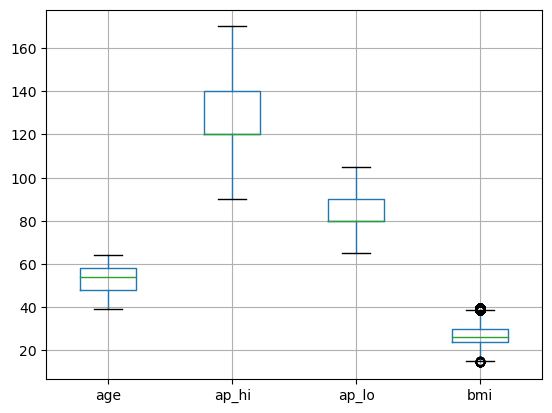

In [45]:
data1[["age","ap_hi","ap_lo","bmi"]].boxplot()
plt.show()

In [47]:
data1[["age","ap_hi","ap_lo","bmi"]].describe()

,age,ap_hi,ap_lo,bmi
count,62745.000000,62745.000000,62745.000000,62745.000000
mean,52.882413,126.404319,81.689537,27.034727
std,6.746333,14.296927,7.673500,4.406103
min,39.000000,90.000000,65.000000,14.479500
25%,48.000000,120.000000,80.000000,23.875115
50%,54.000000,120.000000,80.000000,26.222222
75%,58.000000,140.000000,90.000000,29.757585
max,64.000000,170.000000,105.000000,39.736121


In [48]:
data1["cardio"].value_counts()

0    31783
1    30962
Name: cardio, dtype: int64

C:\Users\tkabe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


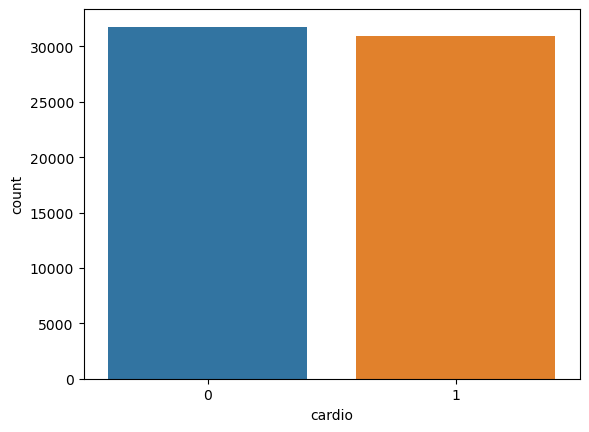

In [50]:
sns.countplot(data1["cardio"])
plt.show()

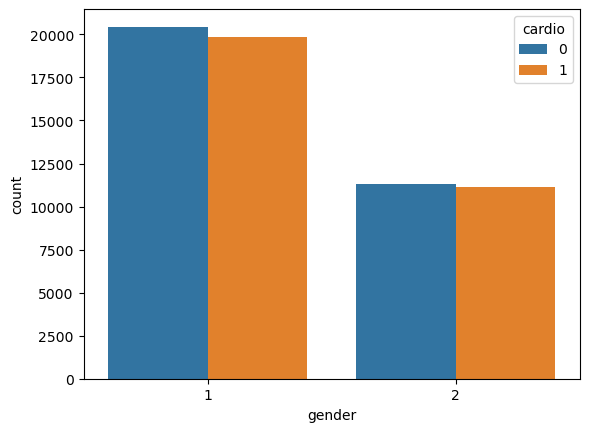

In [53]:
sns.countplot(data=data1,x="gender",hue="cardio")
plt.show()

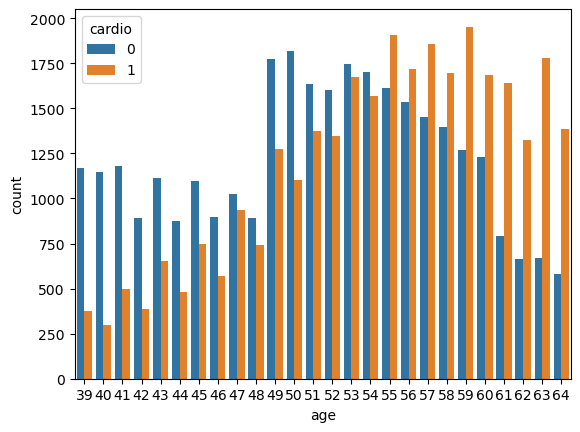

In [51]:
sns.countplot(data=data1,x="age",hue="cardio")
plt.show()

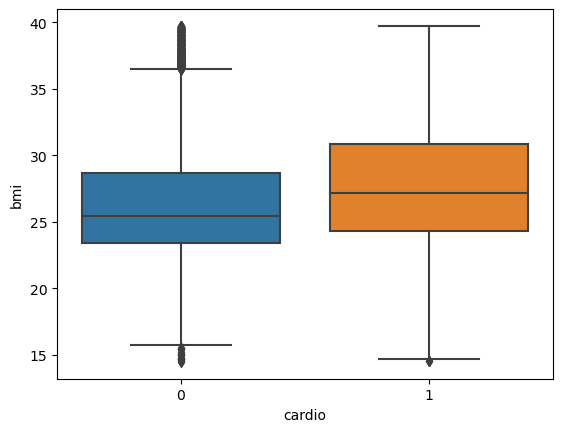

In [52]:
sns.boxplot(data=data1,x="cardio",y="bmi")
plt.show()

In [54]:
data1.corr()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,1.000000,0.004175,0.003867,0.004466,0.001763,0.005715,0.000226,-0.002524,0.000095,0.003844,0.005622,0.000728
age,0.004175,1.000000,-0.030739,0.202365,0.144933,0.151029,0.096284,-0.049243,-0.029480,-0.009205,0.234640,0.103261
gender,0.003867,-0.030739,1.000000,0.052019,0.056059,-0.035805,-0.022102,0.336870,0.170871,0.005692,0.002455,-0.091872
ap_hi,0.004466,0.202365,0.052019,1.000000,0.705185,0.191842,0.084460,0.025262,0.029876,0.003096,0.432115,0.242064
ap_lo,0.001763,0.144933,0.056059,0.705185,1.000000,0.155041,0.064227,0.024361,0.033904,0.000825,0.335994,0.213491
cholesterol,0.005715,0.151029,-0.035805,0.191842,0.155041,1.000000,0.451029,0.009840,0.032022,0.009566,0.218286,0.163094
gluc,0.000226,0.096284,-0.022102,0.084460,0.064227,0.451029,1.000000,-0.007472,0.005360,-0.006851,0.085686,0.106274
smoke,-0.002524,-0.049243,0.336870,0.025262,0.024361,0.009840,-0.007472,1.000000,0.344777,0.024362,-0.018408,-0.026599
alco,0.000095,-0.029480,0.170871,0.029876,0.033904,0.032022,0.005360,0.344777,1.000000,0.025638,-0.010975,0.019210
active,0.003844,-0.009205,0.005692,0.003096,0.000825,0.009566,-0.006851,0.024362,0.025638,1.000000,-0.036023,-0.006700


In [55]:
data1[["age","ap_hi","ap_lo","bmi"]].corr()

,age,ap_hi,ap_lo,bmi
age,1.000000,0.202365,0.144933,0.103261
ap_hi,0.202365,1.000000,0.705185,0.242064
ap_lo,0.144933,0.705185,1.000000,0.213491
bmi,0.103261,0.242064,0.213491,1.000000


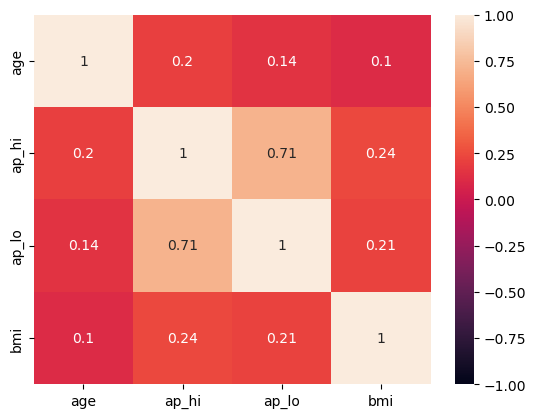

In [56]:
sns.heatmap(data1[["age","ap_hi","ap_lo","bmi"]].corr(),annot=True,vmin=-1,vmax=1)
plt.show()

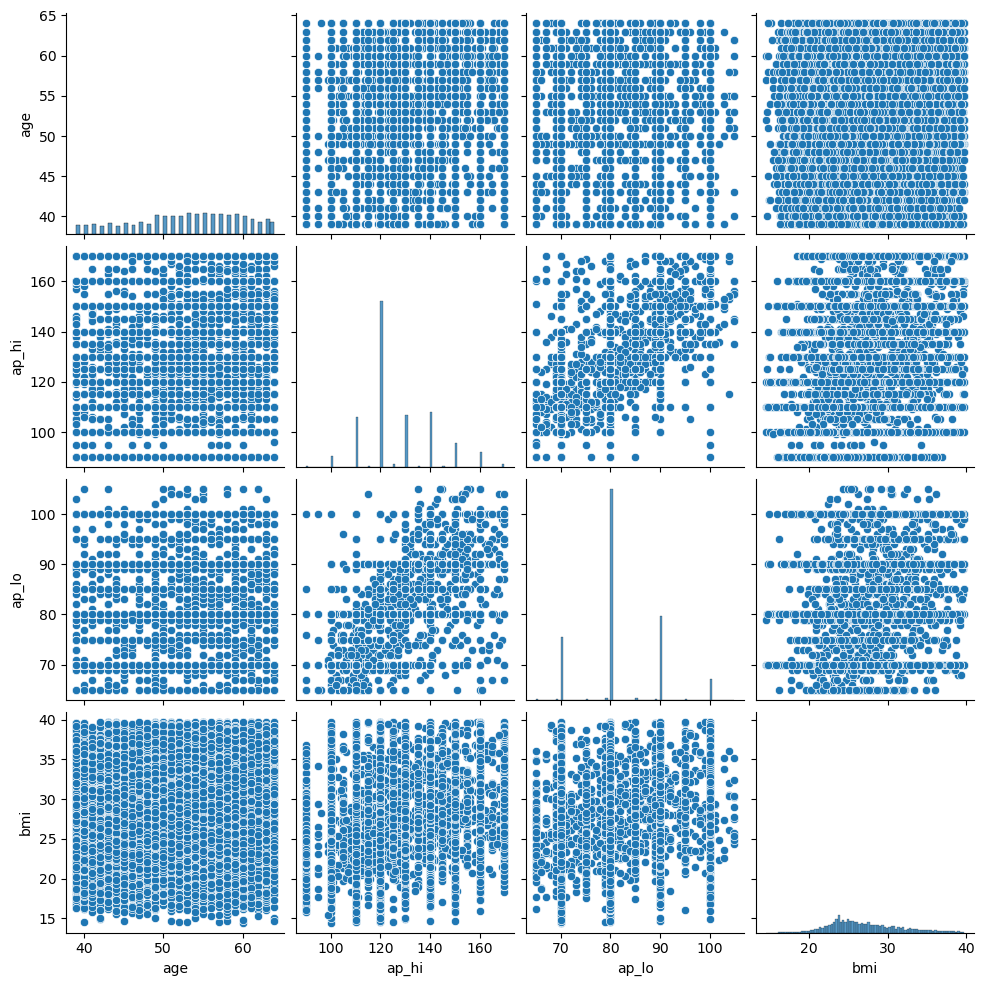

In [57]:
sns.pairplot(data1[["age","ap_hi","ap_lo","bmi"]])
plt.show()

In [59]:
data1.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
5,8,60,1,120,80,2,2,0,0,0,0,29.384676


In [60]:
data1.drop("id",axis="columns",inplace=True)

C:\Users\tkabe\AppData\Local\Temp\ipykernel_13048\2627750686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop("id",axis="columns",inplace=True)


In [61]:
data1.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,110,80,1,1,0,0,1,0,21.967120
1,55,1,140,90,3,1,0,0,1,1,34.927679
2,51,1,130,70,3,1,0,0,0,1,23.507805
3,48,2,150,100,1,1,0,0,1,1,28.710479
5,60,1,120,80,2,2,0,0,0,0,29.384676


In [63]:
data2=data1.reindex(columns=["age","ap_hi","ap_lo","bmi","gender","cholesterol","gluc","smoke","alco","active","cardio"])
data2.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,2,1,1,0,0,1,0
1,55,140,90,34.927679,1,3,1,0,0,1,1
2,51,130,70,23.507805,1,3,1,0,0,0,1
3,48,150,100,28.710479,2,1,1,0,0,1,1
5,60,120,80,29.384676,1,2,2,0,0,0,0


In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
le=LabelEncoder()
data2["gender"]=le.fit_transform(data2["gender"])

In [66]:
data2.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
5,60,120,80,29.384676,0,2,2,0,0,0,0


In [67]:
from sklearn.preprocessing import OneHotEncoder

In [68]:
ohe=OneHotEncoder()

In [69]:
ohot_encoded1=ohe.fit_transform(data2["cholesterol"].values.reshape(len(data2["cholesterol"].values),1)).toarray()
ohot_encoded1=ohot_encoded1[:,1:].astype(int)
df_ohot1=pd.DataFrame(ohot_encoded1,columns=["Above Nor Chol","Well Above Nor Chol"])

In [70]:
df_ohot1

,Above Nor Chol,Well Above Nor Chol
0,0,0
1,0,1
2,0,1
3,0,0
4,1,0
...,...,...
62740,0,0
62741,0,0
62742,0,0
62743,0,0


In [71]:
ohot_encoded2=ohe.fit_transform(data2["gluc"].values.reshape(len(data2["gluc"].values),1)).toarray()
ohot_encoded2=ohot_encoded2[:,1:].astype(int)
df_ohot2=pd.DataFrame(ohot_encoded2,columns=["Above Nor Gluc","Well Above Nor Gluc"])

In [72]:
df_ohot2

,Above Nor Gluc,Well Above Nor Gluc
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
62740,0,0
62741,0,0
62742,0,0
62743,1,0


In [74]:
data2

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
5,60,120,80,29.384676,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69993,53,130,90,23.661439,0,1,1,0,0,1,1
69994,57,150,80,29.384757,0,1,1,0,0,1,1
69995,52,120,80,26.927438,1,1,1,1,0,1,0
69998,61,135,80,27.099251,0,1,2,0,0,0,1


In [75]:
data2.reset_index(inplace=True)

In [76]:
data2

,index,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,110,80,21.967120,1,1,1,0,0,1,0
1,1,55,140,90,34.927679,0,3,1,0,0,1,1
2,2,51,130,70,23.507805,0,3,1,0,0,0,1
3,3,48,150,100,28.710479,1,1,1,0,0,1,1
4,5,60,120,80,29.384676,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62740,69993,53,130,90,23.661439,0,1,1,0,0,1,1
62741,69994,57,150,80,29.384757,0,1,1,0,0,1,1
62742,69995,52,120,80,26.927438,1,1,1,1,0,1,0
62743,69998,61,135,80,27.099251,0,1,2,0,0,0,1


In [78]:
data2.drop("index",axis="columns",inplace=True)
data2

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
4,60,120,80,29.384676,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
62740,53,130,90,23.661439,0,1,1,0,0,1,1
62741,57,150,80,29.384757,0,1,1,0,0,1,1
62742,52,120,80,26.927438,1,1,1,1,0,1,0
62743,61,135,80,27.099251,0,1,2,0,0,0,1


In [79]:
x=pd.concat([data2.iloc[:,:10],df_ohot1,df_ohot2],axis=1)
x.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,Above Nor Chol,Well Above Nor Chol,Above Nor Gluc,Well Above Nor Gluc
0,50,110,80,21.967120,1,1,1,0,0,1,0,0,0,0
1,55,140,90,34.927679,0,3,1,0,0,1,0,1,0,0
2,51,130,70,23.507805,0,3,1,0,0,0,0,1,0,0
3,48,150,100,28.710479,1,1,1,0,0,1,0,0,0,0
4,60,120,80,29.384676,0,2,2,0,0,0,1,0,1,0


In [80]:
x.drop(["cholesterol","gluc"],axis="columns",inplace=True)

In [93]:
x=x.values

In [91]:
y=data2.iloc[:,10].values

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
sc=StandardScaler()

In [94]:
x[:,:4]=sc.fit_transform(x[:,:4])

In [95]:
x[:,:4]

array([[-0.42725964, -1.14741093, -0.2201799 , -1.15014289],
       [ 0.31388961,  0.95095888,  1.08301675,  1.79138238],
       [-0.27902979,  0.25150228, -1.52337654, -0.80046937],
       ...,
       [-0.13079994, -0.44795433, -0.2201799 , -0.02435046],
       [ 1.20326872,  0.60123058, -0.2201799 ,  0.01464426],
       [ 0.46211946, -0.44795433, -0.2201799 , -0.48143443]])

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [98]:
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [99]:
model1=KNeighborsClassifier(n_neighbors=50)
model2=LogisticRegression()
model3=SVC(kernel="rbf",C=1)
model4=RandomForestClassifier(n_estimators=500)

T1=("knn",model1)
T2=("lgr",model2)
T3=("svm",model3)
T4=("rf",model4)

model=VotingClassifier(estimators=[T1,T2,T3,T4],voting="hard")

In [100]:
model.fit(x_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=50)),
                             ('lgr', LogisticRegression()), ('svm', SVC(C=1)),
                             ('rf', RandomForestClassifier(n_estimators=500))])

In [101]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [103]:
y_pred=model.predict(x_test)

C:\Users\tkabe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [104]:
accuracy_score(y_test,y_pred)

0.725157383058411

In [105]:
confusion_matrix(y_test,y_pred)

array([[5192, 1223],
       [2226, 3908]], dtype=int64)